[View in Colaboratory](https://colab.research.google.com/github/lcc2525/utexas_hmwk_python/blob/master/finaltweet1.ipynb)

In [4]:
!pip install tweepy
# Dependencies
import json
import tweepy
import pandas as pd
import csv
from google.colab import files
files.upload()

Saving configtwit.py to configtwit.py


{'configtwit.py': b'consumer_key = "TQi6EPa4sfDDLJhxoLvKZ45Sx"\r\nconsumer_secret = "LOfaGua49SwO14NSsvf2L3XbQGeVnxCVoJBPZX6MZa2wPrwPlB"\r\naccess_token = "1029260403073839104-f1tkdITaKxZkM94IleDppnH9SW8yBT"\r\naccess_token_secret = "Ux7g8aeEYrlwWKYth176tVRzopEaD7xv5cV6bcJlZBP6D"\r\n \r\n '}

In [0]:
# Import Twitter API Keys
from configtwit import consumer_key, consumer_secret, access_token, access_token_secret

In [0]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
#  need to create file before openging it. open("agoat.csv", 'w')
file = open("agoat.csv", 'w+', encoding='utf-8') 
file.close()
# writer = csv.writer(file, delimiter=',')

In [0]:
test_df = pd.DataFrame(columns = ['user','created_at','text'])
def get_tweets(username):

#	#http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
#	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#	auth.set_access_token(access_key, access_secret)
#	api = tweepy.API(auth)

#set count to however many tweets you want; twitter only allows 200 at once
    number_of_tweets = 100
    

#get tweets

    
    tweets= api.user_timeline(screen_name = username,count = number_of_tweets)

#create array of tweet information: username, tweet id, date/time, text
    screen_name_list = []
    created_at_list = []
    texts_list = []
    
    for tweet in tweets:
        screen_name_list.append(username)
        created_at_list.append(tweet['created_at'])
        texts_list.append(tweet['text'])
    
    return screen_name_list,created_at_list,texts_list
    

In [0]:
# Get all tweets from home feed tweet gets all tweets for only username
# public_tweets = api.home_timeline()
# set up tweeters i want to to see 
names_ls = ['lcc2525', 'CNN', 'CBS', 'nytimes', 'BBC', 'FoxNews', 'MSNBC']
#name_ls = '@lcc2525'

In [10]:
# setup dataframe to store values
test_df = pd.DataFrame(columns= ['screen_names',
    'created_at',
    'texts_list'])
test_df

,screen_names,created_at,texts_list


In [0]:

# df_listdf_list  ==  pdpd..DataFrameDataFrame(columns = ['screen_names','created_at','texts_list'])
# df_list


In [0]:
df = []

for name in names_ls:
    x,y,z = get_tweets(name)
  
    test_df = pd.DataFrame({'screen_names':x, 
                'texts_list':z,
                'created_at':y,
                })

    df.append(test_df)

final_df = pd.concat(df)
final_df = final_df[[ 'screen_names', 'created_at', 'texts_list']]
#final_df = final_df.sort_index(axis=1, index=False)

final_df.to_csv('agoat.csv')
files.download('agoat.csv')
#  test_df

In [12]:
!pip install vaderSentiment
!pip install nltk
import nltk
import nltk.sentiment.vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA
# from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

from IPython import display

import numpy as np

sia = SIA()
results = []
sent_valist = []

    100% |████████████████████████████████| 133kB 6.3MB/s 


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:

# texts_list
for line in test_df['texts_list']:
    first_score = sia.polarity_scores(line)
#    print(first_score['compound'])
    results.append(first_score['compound'])
#    print(sent_valist)
shows_df = pd.DataFrame(results)
# shows_df.reset_index()
# shows_df.rename(shows_df.loc[0] : "Compound")
# shows_df =shows_df.rename({})
# shows_df = pd.DataFrame(results, columns='Compound')
# #    results.append(test_df)
# # def print_sentiment_scores(sentence):
# #     snt = analyzer.polarity_scores(sentence)
# #     # print("{:-<40} {}".format(sentence, str(snt)))
# #     return snt
# shows_df2 = pd.DataFrame(shows_df)

shows_df   

,0
0,-0.3182
1,-0.2500
2,-0.3400
3,-0.4019
4,0.0000
5,-0.1779
6,0.0000
7,0.2960
8,0.4404
9,0.0000


In [14]:


# ({'Compound' : sent_valist})
# sent_valistdf = []

results2 = final_df.join(shows_df)
# #  frames_df = [final_df, sent_valist]
# score_tweetdf = pd.merge(final_df, shows_df, how='left')
#score_tweetdf = final_df.merge(sent_valistdf, how='right', on=index)
# score_tweetdf

results2.reset_index()
results2.columns = ['tweeter', 'Date', 'Tweets', 'Polarity']
#df.columns = ['NFLX', 'AAPL', 'GOOGL', 'FB', 'TSLA']
results2.to_csv('agoat2.csv')
files.download('agoat2.csv')
results2.head()

,tweeter,Date,Tweets,Polarity
0,lcc2525,Thu Aug 30 20:50:21 +0000 2018,RT @Mr_RyanGuillory: Last year Donald Trump al...,-0.3182
0,CNN,Thu Aug 30 22:21:00 +0000 2018,Canada’s economy is growing faster than expect...,-0.3182
0,CBS,Thu Aug 30 19:45:51 +0000 2018,RT @cbsallaccess: Money. Murder. Mystery. #One...,-0.3182
0,nytimes,Thu Aug 30 22:17:02 +0000 2018,The British government says energy drinks are ...,-0.3182
0,BBC,Thu Aug 30 19:02:03 +0000 2018,"The story, both thrilling and dark, of the wor...",-0.3182


In [0]:
# import matplotlib.pyplot as plt
# # !pip install seaborn
# import seaborn as sns
# np.random.seed(1974)

# dataf = pd.DataFrame(
#       np.random.normal(10, 1, 30).reshape(10,3),
#       index=pd.date_range('2018-11-29', freq='D', periods=10),
#       columns=('Date', 'Polarity', 'tweeter'))
# # dataf['key'] = results2('tweeter')

# sns.pairplot(x_vars=["Date"], y_vars=["Polarity"], data=dataf, hue=results2["tweeter"], size=5)

In [0]:
# for username in test_df["screen_names"]:
#   sentence_df = print_sentiment_scores(test_df["texts_list"])
   
  
# # for username in test_df.loc['screen_names']:
#   final_df['SS_scores'] = analyzer.polarity_scores[(test_df['texts_list'])]
# # #  final_df['SS_scores'] = vs 

  
# # final_df   
# # for sentence in sentences:
# #     vs = analyzer.polarity_scores(sentence)
# #     print("{:-<65} {}".format(sentence, str(vs)))

In [0]:
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# N = 7 # Number of labels

# # setup the plot
# fig, ax = plt.subplots(1,1, figsize=(6,6))
# # define the data
# x = results2.Date
# y = results2.Polarity
# tag = results2.tweeter # Tag each point with a corresponding label    

# # define the colormap
# cmap = plt.cm.jet
# # extract all colors from the .jet map
# cmaplist = [cmap(i) for i in range(cmap.N)]
# # create the new map
# cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# # define the bins and normalize
# bounds = np.linspace(0,N,N+1)
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# # make the scatter
# scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,N),cmap=cmap,     norm=norm)
# # create the colorbar
# cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
# cb.set_label('Custom cbar')
# ax.set_title('Discrete color mappings')
# plt.show()

ValueError: ignored

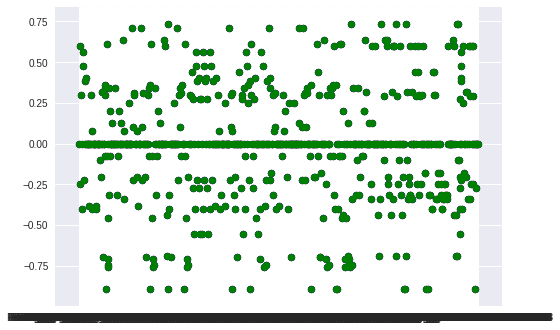

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
# # Create data
# N = 500
x = results2.Date
ys = results2.Polarity

colors = itertools.cycle(["r", "b", "g", "o", "y", "w", "t"])
for y in ys:
    plt.scatter(x, ys, color=next(colors))

# colmaps = ['Blues', 'Greys', 'Reds', 'Oranges', 'Greens', 'Yellows', 'Whites']
# # area = results2.tweeter
 
# # for name in names_ls:
# #     plt.scatter(x[name], y[name], c=t, cmap=colmaps[name], label=name)
  
# # Plot
# plt.scatter(x, y, colors = colmaps, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

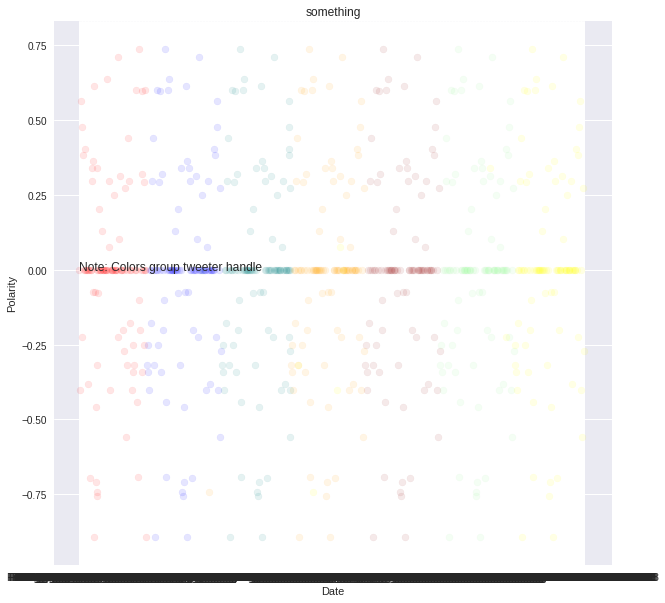

In [22]:
# filtered to single year




colors = [
    'red', 
    'blue',
    'teal',
    'orange', 
    'brown',
    'palegreen',
    'yellow',
]

for z, c in zip(names_ls, colors):
    # filter df to zip
    results_df = results2.loc[results2['tweeter'] == z, : ]

    # pull coords
    y_lat = results_df['Polarity'].tolist()
    x_long = results_df['Date'].tolist()

    # add to matplotlib scatter plot
    plt.scatter(x_long, y_lat, marker="o", facecolors= c, alpha=.10)

# Prints the scatter plot to the screen
plt.title('''something''')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.rcParams['figure.figsize']=(10,10)
plt.text(0,0, s='''Note: Colors group tweeter handle''')
# Save Figure
plt.savefig("tweet_projects.png")
